ur3.csv is the data for design 3 after cleaning(the one we cleaned two weeks ago) </br>
You need to upload ur3.csv first to run the code

In [1]:
import pandas as pd
#be sure to put the right filename here
ur3 = pd.read_csv('design_2_clean.csv', header=[0, 1])

In [2]:
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
# Using 30% testing data
C_test = ur3

In [4]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [5]:
# Yuya's code, but changed a bit to fit our data with two headers
def build_plot(ax, data: pd.DataFrame, factor: str, factor_levels: np.ndarray, y: str,
    name: str, title: str, max_plot_val=1.0, boxplot=False, old_exp=[], min_plot_val=0.0):
    '''
    Builds a plot of the effect of the factor on y
    Parameters
    ----------
    ax: an axes object in matplotlib
    data (pandas.DataFrame): df containing data of the experiment.
    factor (str): the name of the independent variable.
    factor_levels (numpy.ndarray): the list of levels of factor.
    y (str): the name of the dependent variable.
    name (str): the version of the experiment.
    title (str): the title of this axes.
    max_plot_val (float): the maximum value of the plot. 
    boxplot (bool): True if you want to use boxplots. False if you want bar graphs.
    old_exp (list): the list of experiments that do not have any non-binary factors.
    '''
    # Create Arrays for the plot
    mean_outcomes = []
    se_outcomes = []
    num_students = []
    groups = factor_levels
    base_data = data # reference level
    for i in range(1, len(factor_levels)):
        base_data = base_data[base_data[factor + '_' + factor_levels[i]].iloc[:,0] == 0]
        assigned = data[
            data[factor + '_' + factor_levels[i]].iloc[:,0] == 1]
        num_students.append(len(assigned))
        if boxplot: # a boxplot requires a 2D array
            mean_outcomes.append(assigned[y].iloc[:,0])
        else:
            mean_outcomes.append(np.mean(assigned[y].iloc[:,0]))
            se_outcomes.append(stats.sem(assigned[y].iloc[:,0]))

    num_students.insert(0, len(base_data))
    if boxplot: # a boxplot requires a 2D array
        mean_outcomes.insert(0, base_data[y].iloc[:,0])
    else:
        mean_outcomes.insert(0, np.mean(base_data[y].iloc[:,0]))
        se_outcomes.insert(0, stats.sem(base_data[y].iloc[:,0]))                
    if name in old_exp: # factors with two levels
        groups = ['no', 'yes']
        mean_outcomes = mean_outcomes[:2]
        num_students = num_students[:2]
        if not boxplot:
            se_outcomes = se_outcomes[:2]
            
    x_pos = np.arange(len(groups))

    # Build the plot
    if boxplot:
        ax.boxplot(mean_outcomes, labels=groups, whis=2.0)
    else:
        ax.bar(x_pos, mean_outcomes, yerr=se_outcomes, align='center', 
            alpha=0.5, ecolor='black', capsize=20)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(groups, fontsize = 12)
    # Add text in graphs (mean and sample size)
    for i in range(len(groups)):
        if boxplot:
            ax.text(i+1, 0.2*max_plot_val, 'Median =', ha='center', va='bottom',
                    fontweight='bold', fontsize = 16)
            ax.text(i+1, 0.15*max_plot_val, str(np.round(mean_outcomes[
                i].median(), 2)), ha='center', va='bottom', fontweight='bold', fontsize = 16)
            ax.text(i+1, 0.05*max_plot_val, 'n = %s' %num_students[
                i], ha='center', va='bottom', fontweight='bold', fontsize = 16)
        else:
            ax.text(i, 0.2*max_plot_val, 'Mean =', ha='center', va='bottom', fontweight='bold', 
                fontsize = 14)
            ax.text(i, 0.15*max_plot_val, str(np.round(
                mean_outcomes[i],2)), ha='center', va='bottom', fontweight='bold', 
                fontsize = 14)
            ax.text(i, 0.05*max_plot_val, 'n = %s' %num_students[
                i], ha='center', va='bottom', fontweight='bold', fontsize = 14)

    ax.set_title(title, fontsize = 16)
    ax.set_ylim(min_plot_val, max_plot_val)
    ax.yaxis.grid(True)

In [6]:
# Yuya's code (not changed)
def plot_main(data: pd.DataFrame, factors: np.ndarray, levels: np.ndarray, y: str, 
    ylabel: str, name: str, max_plot_val=1.0, boxplot=False, old_exp=[], min_plot_val=0.0):
    '''
    For each valid combination of independent (dummy) variables, plots interaction effects.
    Parameters
    ----------
    data (pandas.DataFrame): df containing data of the experiment.
    factors (numpy.ndarray): the list of the independent variables.
    levels (numpy.ndarray): the matrix of factor x level. Each raw represents a factor 
    and each element in a raw represents a level.
    y (str): the name of the dependent variable.
    ylabel (str): the description of the dependent variable that goes to a y-axis of a figure.
    name (str): the version of the experiment.
    max_plot_val (float): the maximum value of the plot. 
    boxplot (bool): True if you want to use boxplots. False if you want bar graphs.
    old_exp (list): the list of experiments that do not have any non-binary factors.
    '''
    
    for factor, factor_levels in zip(factors, levels):
        fig, ax = plt.subplots()
        try:
            build_plot(ax, data, factor, factor_levels, y, name, name.replace(
                '_', ' ').title(), max_plot_val, boxplot, old_exp, min_plot_val)
        except ValueError as e:
            print('Not enough data for ' + factor)
            continue
        ax.set_ylabel(ylabel, fontsize = 16)
        ax.set_xlabel(factor, fontsize = 16)
   
        # Save the figure and show
        plt.show()

# Message A and B together

## Main effect of message A and B together

In [7]:
# create new column showC_2
C_test['show_A1B1', 'show_A1B1'] = (C_test['version_id21', 'version_id21'] == 5296).astype(int)

In [8]:
# create new column showC_2
C_test['show_A1B2', 'show_A1B2'] = (C_test['version_id21', 'version_id21'] == 5297).astype(int)

In [9]:
# create new column showC_2
C_test['show_A1B3', 'show_A1B3'] = (C_test['version_id21', 'version_id21'] == 5298).astype(int)

In [10]:
# create new column showC_2
C_test['show_A2B1', 'show_A2B1'] = (C_test['version_id21', 'version_id21'] == 5299).astype(int)

In [11]:
# create new column showC_2
C_test['show_A2B2', 'show_A2B2'] = (C_test['version_id21', 'version_id21'] == 5300).astype(int)

In [12]:
# create new column showC_2
C_test['show_A2B3', 'show_A2B3'] = (C_test['version_id21', 'version_id21'] == 5301).astype(int)
C_test['show_A1B1', 'show_A1B1'].head(20)

0     0
1     0
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     0
10    1
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    1
19    1
Name: (show_A1B1, show_A1B1), dtype: int64

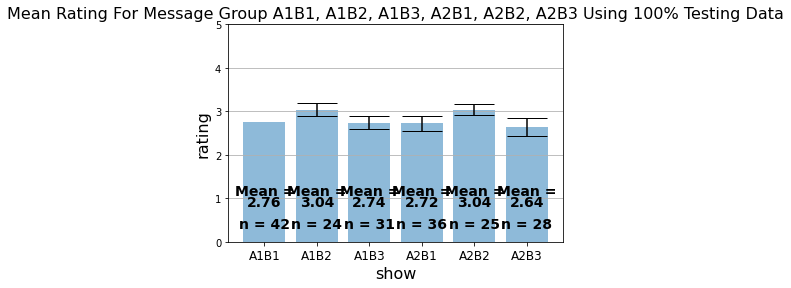

In [13]:
# plot main effect for design 3
plot_main(C_test, np.array(['show']),
          np.array([['A1B1','A1B2','A1B3', 'A2B1', 'A2B2', 'A2B3']]), 'reward_design2',
          'rating', 'Mean Rating for Message Group A1B1, A1B2, A1B3, A2B1, A2B2, A2B3 Using 100% Testing Data',max_plot_val=5,boxplot=False,old_exp=[],
         min_plot_val=0)

## Step 0: Family-Wise Error Rate

In [14]:
#Number of comaprisons:
c = sum(range(1,6)) # 1+ 2+ ... + 5 = 15
alpha = 0.05 #for each individual test

fwe = 1- (1- alpha)**c
print(fwe)

0.536708769840247


Since we are performing hypotheses tests, there's a 53.7% likelihood of us making one or more type 1 errors.

## Step 1 : One-Way ANOVA Omnibus

Now we've got a lot of message groups here, so we're going to want to run an ANOVA first. An omnibus ANOVA test will let us know if there's any significant differences between any two of the message groups.



In [15]:
# get each message group's reward rows
shown_A1B1_reward = C_test[(C_test['showA_2', 'showA_2'] == 0) & (C_test['showB_2', 'showB_2'] == 0) & (C_test['showB_3', 'showB_3'] == 0)]['reward_design2'].iloc[:,0]
shown_A1B2_reward = C_test[(C_test['showA_2', 'showA_2'] == 0) & (C_test['showB_2', 'showB_2'] == 1)]['reward_design2'].iloc[:,0]
shown_A1B3_reward = C_test[(C_test['showA_2', 'showA_2'] == 0) & (C_test['showB_3', 'showB_3'] == 1)]['reward_design2'].iloc[:,0]
shown_A2B1_reward = C_test[(C_test['showA_2', 'showA_2'] == 1) & (C_test['showB_2', 'showB_2'] == 0) & (C_test['showB_3', 'showB_3'] == 0)]['reward_design2'].iloc[:,0]
shown_A2B2_reward = C_test[(C_test['showA_2', 'showA_2'] == 1) & (C_test['showB_2', 'showB_2'] == 1)]['reward_design2'].iloc[:,0]
shown_A2B3_reward = C_test[(C_test['showA_2', 'showA_2'] == 1) & (C_test['showB_3', 'showB_3'] == 1)]['reward_design2'].iloc[:,0]

In [16]:
shown_A1B1_reward = shown_A1B1_reward.dropna()

In [17]:
stats.f_oneway(shown_A1B1_reward, shown_A1B2_reward, shown_A1B3_reward, shown_A2B1_reward, shown_A2B2_reward, shown_A2B3_reward)

F_onewayResult(statistic=0.8732994684468041, pvalue=0.5001929606378603)

Since pvalue is 0.5001929606378603, fail to reject H0, that is there is no signicant differences between any two of the message groups. <br/>
## Since we fail to reject the null hypothesis, no further analysis is required. But we still do further analysis here to see if they all come to the same conclusion.


## Step 2: Applying Multiple T-Test Comparisons (Uncorrected)

We're now going to compare every two message groups with a t-test and the result will be used in Step 4 later.

In [18]:
#Applying T-test on A1B1, A1B2, A1B3, A2B1, A2B2, A2B3
message_group_rewards = [shown_A1B1_reward, shown_A1B2_reward, shown_A1B3_reward, shown_A2B1_reward, shown_A2B2_reward, shown_A2B3_reward]
message_group_name = ["A1B1", "A1B2", "A1B3", "A2B1", "A2B2", "A2B3"]

ttest_results = {}
 
for j in range(0, len(message_group_rewards) ):
  for i in range(j+1, len(message_group_rewards)):
    msg = 'T-test for ' + message_group_name[j] + ' and ' + message_group_name[i] + ':'
    ttest_results[msg] = stats.ttest_ind(message_group_rewards[j], message_group_rewards[i], equal_var=False, nan_policy="omit")
    i += 1

In [19]:
ttest_results

{'T-test for A1B1 and A1B2:': Ttest_indResult(statistic=-1.2920138429213779, pvalue=0.20110638317990534),
 'T-test for A1B1 and A1B3:': Ttest_indResult(statistic=0.06306001321200252, pvalue=0.9498984482032566),
 'T-test for A1B1 and A2B1:': Ttest_indResult(statistic=0.13635858780855387, pvalue=0.8919090647504804),
 'T-test for A1B1 and A2B2:': Ttest_indResult(statistic=-1.305836797695098, pvalue=0.19628503383074078),
 'T-test for A1B1 and A2B3:': Ttest_indResult(statistic=0.4303199567324452, pvalue=0.6685258553507756),
 'T-test for A1B2 and A1B3:': Ttest_indResult(statistic=1.4750940223993012, pvalue=0.14615609725729703),
 'T-test for A1B2 and A2B1:': Ttest_indResult(statistic=1.3932664808449349, pvalue=0.1688639563511584),
 'T-test for A1B2 and A2B2:': Ttest_indResult(statistic=0.00853649511745154, pvalue=0.9932252193964901),
 'T-test for A1B2 and A2B3:': Ttest_indResult(statistic=1.626757864846339, pvalue=0.11049977262763375),
 'T-test for A1B3 and A2B1:': Ttest_indResult(statistic=0

## Step 3: Applying Tukey Method (correction a)

The Tukey method of ANOVA is one that allows us to do all those pairwise comparisons but accounts for multiple comparison problem

In [20]:
C_test_dropNA = C_test[C_test['reward_design2'].notna().iloc[:,0]]

In [21]:
C_test_dropNA[("message_group", 'message_group')] = C_test_dropNA.apply(lambda x: x[("version_id21", "version_id21")] - 5296, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
C_test_dropNA[("message_group", 'message_group')] = C_test_dropNA.apply(lambda x: message_group_name[int(x[("message_group", 'message_group')])], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
C_test_dropNA[("message_group", 'message_group')].value_counts()

A1B1    41
A2B1    36
A1B3    31
A2B3    28
A2B2    25
A1B2    24
Name: (message_group, message_group), dtype: int64

In [24]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)


res2 = pairwise_tukeyhsd(C_test_dropNA['reward_design2'], C_test_dropNA[("message_group", 'message_group')])

print(res2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  A1B1   A1B2   0.2856 0.8316 -0.4168 0.9879  False
  A1B1   A1B3  -0.0142    0.9 -0.6646 0.6362  False
  A1B1   A2B1  -0.0339    0.9  -0.658 0.5903  False
  A1B1   A2B2   0.2839 0.8269 -0.4095 0.9773  False
  A1B1   A2B3  -0.1132    0.9 -0.7832 0.5567  False
  A1B2   A1B3  -0.2997 0.8368 -1.0427 0.4433  False
  A1B2   A2B1  -0.3194 0.7705 -1.0396 0.4007  False
  A1B2   A2B2  -0.0017    0.9 -0.7826 0.7793  False
  A1B2   A2B3  -0.3988 0.6368  -1.159 0.3614  False
  A1B3   A2B1  -0.0197    0.9 -0.6893 0.6499  False
  A1B3   A2B2   0.2981 0.8329 -0.4365 1.0326  False
  A1B3   A2B3  -0.0991    0.9 -0.8115 0.6134  False
  A2B1   A2B2   0.3178 0.7654 -0.3937 1.0292  False
  A2B1   A2B3  -0.0794    0.9 -0.7679 0.6092  False
  A2B2   A2B3  -0.3971  0.631 -1.1491 0.3548  False
---------------------------------------------------


For all comparisons between two message groups, fail to reject the null hypothesis, that is there is no significant difference between any two of the message groups.

Figure(720x432)


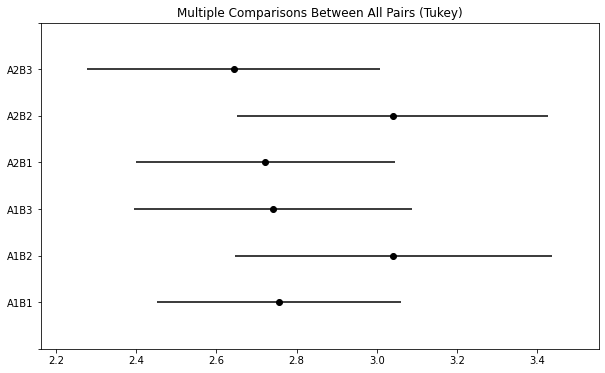

In [25]:
print(res2.plot_simultaneous())

## Step 4: Applying the Bonferroni Method (correction b)

Now another method we could use to correct for multiple comparisons and p-hacking is the Bonferroni Method, however it is known to be extremely strict in determining what is significant.

This method prompts us to change our alpha based on how many comparisons we've done.

alpha_new = alpha_old / number_of_comparisons

In [26]:
alpha_new = alpha/c
alpha_new

0.0033333333333333335

Now we use this as our new alpha and run the t-tests again. 

In [27]:
sig_results_bonferroni = {}
for key in ttest_results.keys():
  if ttest_results[key].pvalue < alpha_new:
    sig_results_bonferroni[key] = ttest_results[key]

sig_results_bonferroni

{}

For all comparisons between two message groups, fail to reject the null hypothesis, that is there is no significant difference between any two of the message groups. <br/>
(Step 2, Step 3 and Step 4 have the same result). <br/>

# Message A

## Main effect of 2 versions of message A

In [28]:
# create new column show_A1
C_test['show_A1', 'show_A1'] = (C_test['showA_2', 'showA_2'] == 0).astype(int)

In [29]:
# create new column show_A2
C_test['show_A2', 'show_A2'] = (C_test['showA_2', 'showA_2'] == 1).astype(int)

In [30]:
# create new column show_B1
C_test['show_B1', 'show_B1'] = ((C_test['showB_2', 'showB_2'] == 0) & (C_test['showB_3', 'showB_3'] == 0) ).astype(int)

In [31]:
# create new column show_B2
C_test['show_B2', 'show_B2'] = (C_test['showB_2', 'showB_2'] == 1).astype(int)

In [32]:
# create new column show_B3
C_test['show_B3', 'show_B3'] = (C_test['showB_3', 'showB_3'] == 1).astype(int)

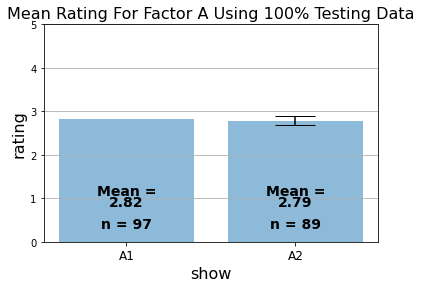

In [33]:
# plot main effect for design 3
plot_main(C_test, np.array(['show']),
          np.array([['A1','A2']]), 'reward_design2',
          'rating', 'Mean Rating for factor A Using 100% Testing Data',max_plot_val=5,boxplot=False,old_exp=[],
         min_plot_val=0)

## Step 0: Applying T-Test between A1 and A2
Since we are only doing comparisons between two groups, we can only use T-test.

In [34]:
# get showA1 and showA2 reward rows
shown_A1_reward = C_test[C_test[("showA_2", "showA_2")] == 1.0]['reward_design2'].iloc[:,0]
shown_A2_reward = C_test[C_test[("showA_2", "showA_2")] == 0.0]['reward_design2'].iloc[:,0]

In [35]:
stats.ttest_ind(shown_A1_reward, shown_A2_reward, equal_var=False, nan_policy="omit")

Ttest_indResult(statistic=-0.2598891231589498, pvalue=0.7952475269188679)

Since pvalue is 0.7952475269188679, which is greater than 0.05, we fail to reject the null hypothesis, that is there is no significant difference between the means of A1 and A2.

# Message B

## Main effect of 2 versions of message B

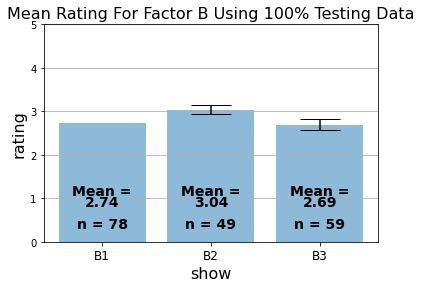

In [36]:
# plot main effect for design 2
plot_main(C_test, np.array(['show']),
          np.array([['B1','B2','B3']]), 'reward_design2',
          'rating', 'Mean Rating for factor B Using 100% Testing Data',max_plot_val=5,boxplot=False,old_exp=[],
         min_plot_val=0)

## Step 0: Family-Wise Error Rate

In [37]:
#Number of comaprisons:
c = sum(range(1,3)) # 1+ 2 = 3
alpha = 0.05 #for each individual test

fwe = 1- (1- alpha)**c
print(fwe)

0.1426250000000001


Since we are performing hypotheses tests, there's a 14.3% likelihood of us making one or more type 1 errors.

## Step 1 : One-Way ANOVA Omnibus

Now we've got a lot of message versions here, so we're going to want to run an ANOVA first. An omnibus ANOVA test will let us know if there's any significant differences between any two of the message versions.

In [38]:
# get each message version's reward rows
shown_B1_reward = C_test[C_test[("show_B1", "show_B1")] == 1.0]['reward_design2'].iloc[:,0]
shown_B2_reward = C_test[C_test[("show_B2", "show_B2")] == 1.0]['reward_design2'].iloc[:,0]
shown_B3_reward = C_test[C_test[("show_B3", "show_B3")] == 1.0]['reward_design2'].iloc[:,0]

In [39]:
shown_B1_reward = shown_B1_reward.dropna()

In [40]:
stats.f_oneway(shown_B1_reward, shown_B2_reward, shown_B3_reward)

F_onewayResult(statistic=2.1236025592111982, pvalue=0.12255407430260017)

Since pvalue is 0.12255407430260017, fail to reject H0, that is there is no signicant differences between any two of the message versions. <br/>
## Since we fail to reject the null hypothesis, no further analysis is required. 



## Step 2: Applying Multiple T-Test Comparisons (Uncorrected)

In [41]:
stats.ttest_ind(shown_B1_reward, shown_B2_reward, equal_var=False, nan_policy="omit")

Ttest_indResult(statistic=-1.9204121057853814, pvalue=0.05710254136198742)

In [42]:
# Applying T-Test between B2 and B3

# get showB2 and showB3 reward rows
shown_B2_reward = C_test[C_test[("show_B2", "show_B2")] == 1.0]['reward_design2'].iloc[:,0]
shown_B3_reward = C_test[C_test[("show_B3", "show_B3")] == 1.0]['reward_design2'].iloc[:,0]

stats.ttest_ind(shown_B2_reward, shown_B3_reward, equal_var=False, nan_policy="omit")

Ttest_indResult(statistic=2.2291178394441604, pvalue=0.027953171206762502)

In [43]:
# Applying T-Test between B1 and B3

# # get showB1 and showB3 reward rows
# shown_B1_reward = C_test[C_test[("show_B1", "show_B1")] == 1.0]['reward_design2'].iloc[:,0]
# shown_B3_reward = C_test[C_test[("show_B3", "show_B3")] == 1.0]['reward_design2'].iloc[:,0]

stats.ttest_ind(shown_B1_reward, shown_B3_reward, equal_var=False, nan_policy="omit")

Ttest_indResult(statistic=0.26208008170731445, pvalue=0.7936680954730961)